In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.preprocessing import OrdinalEncoder
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
#pd.set_option('display.max_rows', None)
%run functions.ipynb

In [2]:
print(display())

csv file reading--> read_csv(filename)
column name standardization --> col_standard(columns)
splitting data into categorical and numerical --> data_split(data)
Null value counts for each column--> null_counts(data)
Droping null values. Call this function only needed --> drop_null(data)
column Droping --> col_drop(data,columnName)
None


In [3]:
data = read_csv('regression_data_clean.csv')

In [4]:
data.head(5)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [5]:
#data.drop_duplicates()


In [6]:
data['bedrooms'] = data['bedrooms'].astype(str)

In [7]:
data['bedrooms'].dtype

dtype('O')

In [8]:
data['waterfront'] = data['waterfront'].astype(str)

In [9]:
data['view'] = data['view'].astype(str)

In [10]:
data['floors'] = data['floors'].astype(str)

In [11]:
data['condition'] = data['condition'].astype(str)

In [12]:
data['grade'] = data['grade'].astype(str)

In [13]:
data['bathrooms'] = data['bathrooms'].astype(str)

In [14]:
data = col_drop(data,['id'])

In [15]:
data = col_drop(data,['date'])

In [16]:
data['zipcode'] = data['zipcode'].astype(str)

In [17]:
data['bathrooms'].value_counts()

2.5     5377
1.0     3851
1.75    3048
2.25    2047
2.0     1930
1.5     1445
2.75    1185
3.0      753
3.5      731
3.25     589
3.75     155
4.0      136
4.5      100
4.25      79
0.75      71
4.75      23
5.0       21
5.25      13
5.5       10
1.25       9
6.0        6
5.75       4
0.5        4
8.0        2
6.75       2
6.25       2
6.5        2
7.75       1
7.5        1
Name: bathrooms, dtype: int64

In [18]:
X_num,X_cat = data_split(data)

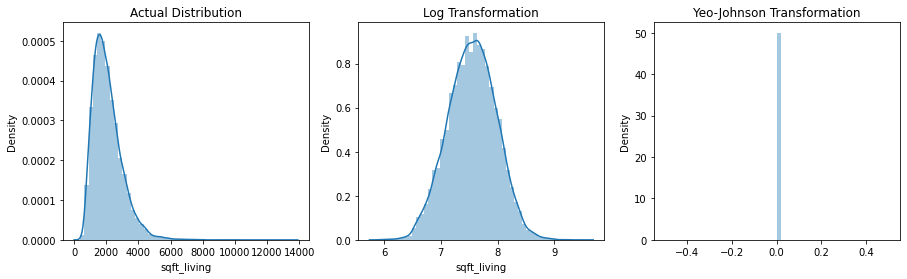

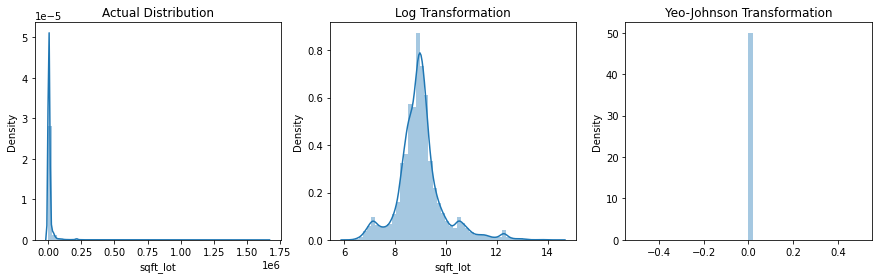

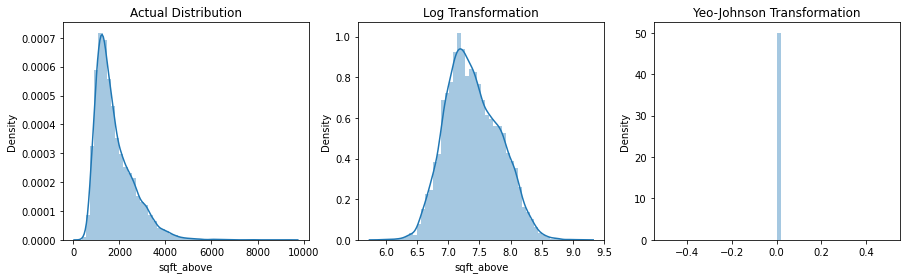

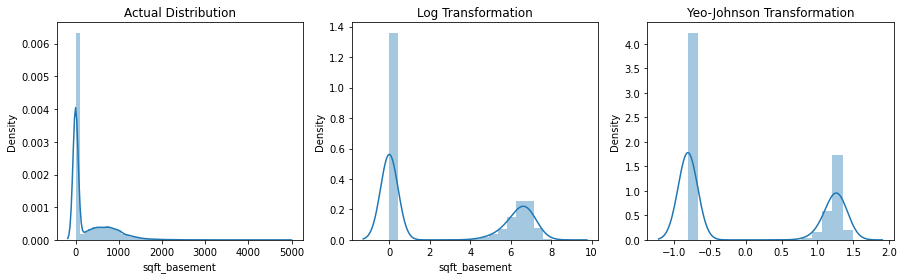

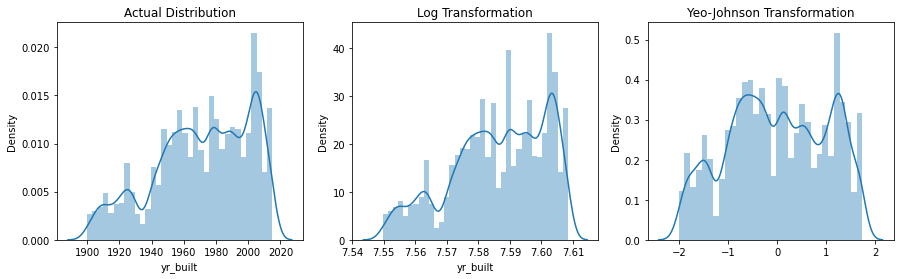

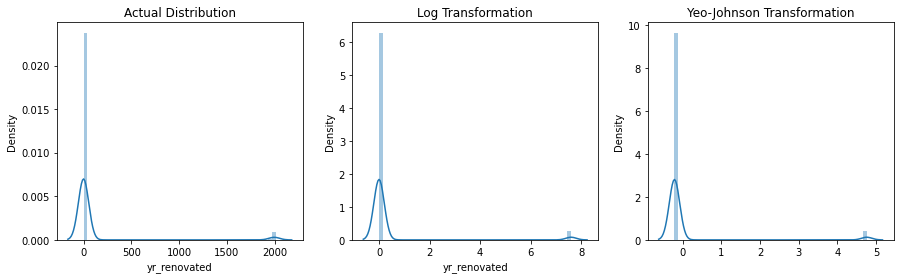

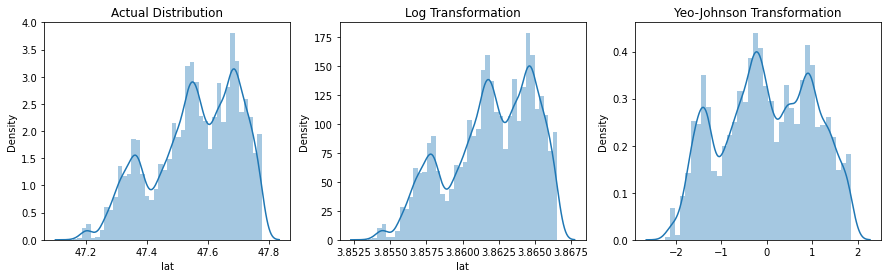

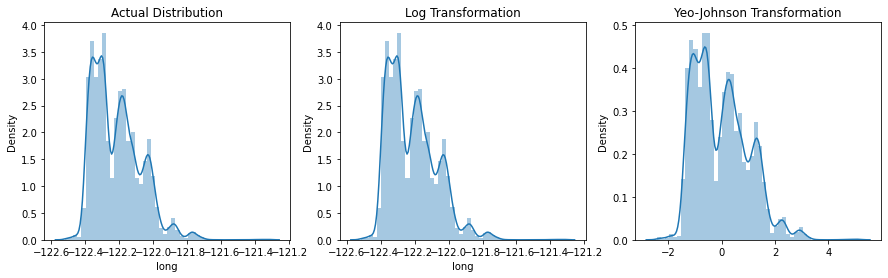

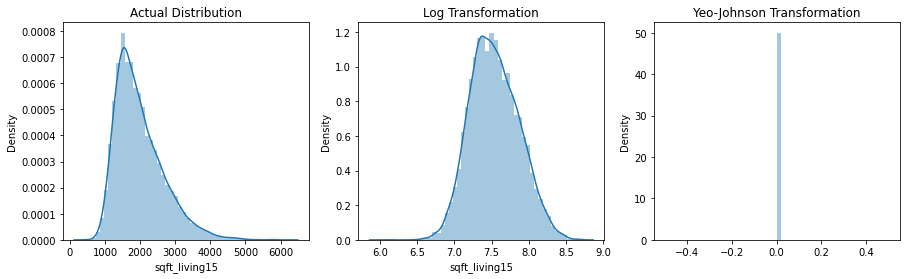

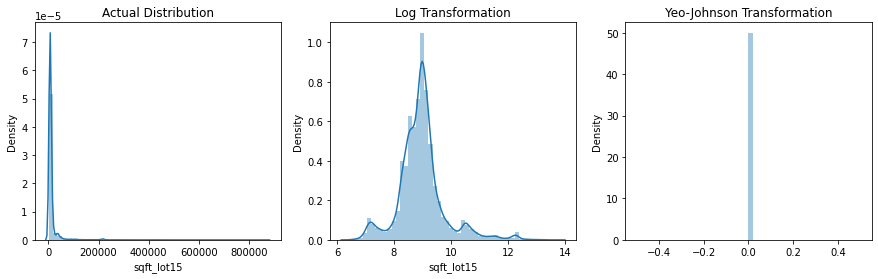

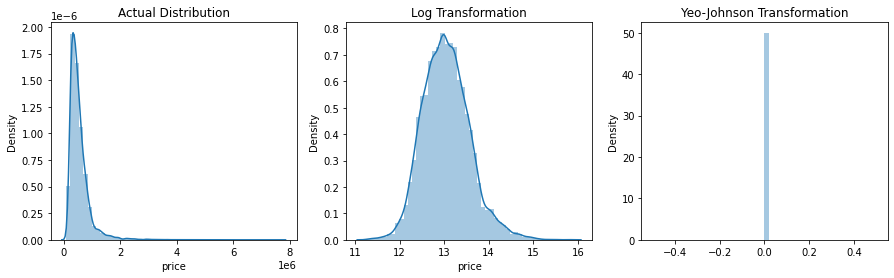

In [19]:
for val in X_num.columns:
    distribution_plot(X_num,val)

In [20]:
my_list = ['yr_built', 'yr_renovated','lat','long','price']
my_list1 = my_difference(X_num.columns,my_list)
print(my_list1)

['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']


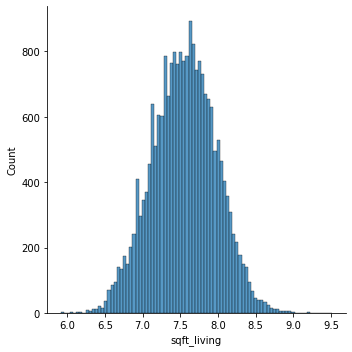

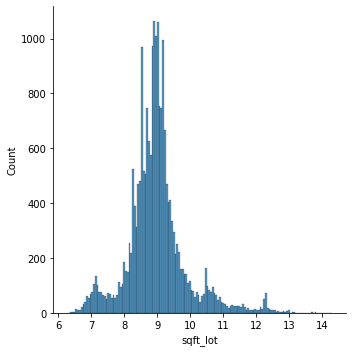

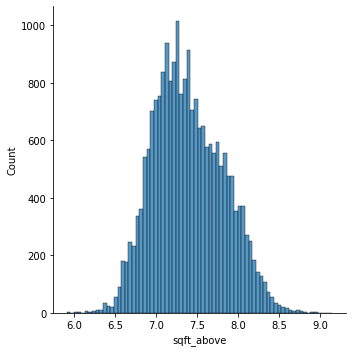

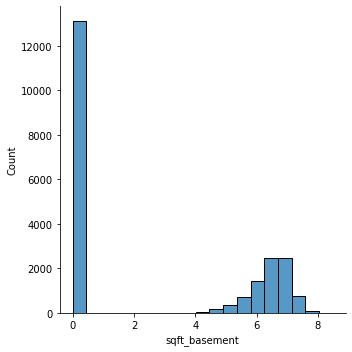

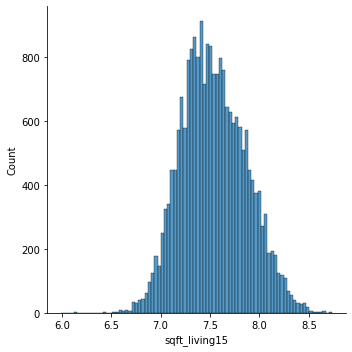

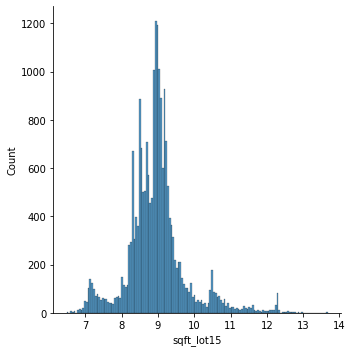

In [21]:
for val in my_list1:
    X_num[val] = X_num[val].apply(lambda x: np.log(x) if(x>0) else x)
    sns.displot(X_num[val])


In [62]:
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(X_num['lat'].values.reshape(-1,1))
data_trans = [item[0] for item in data_trans]
X_num['lat'] = data_trans
data_trans1 = power.fit_transform(X_num['yr_built'].values.reshape(-1,1))
data_trans1 = [item[0] for item in data_trans1]
X_num['yr_built'] = data_trans1

In [22]:
for val in X_cat.columns:
    print(X_cat[val].unique())

['3' '2' '4' '5' '1' '6' '7' '8' '9' '11' '10' '33']
['1.0' '2.25' '3.0' '2.0' '4.5' '1.5' '2.5' '1.75' '2.75' '3.25' '4.0'
 '3.5' '0.75' '4.75' '5.0' '4.25' '3.75' '1.25' '5.25' '6.0' '0.5' '5.5'
 '6.75' '5.75' '8.0' '7.5' '7.75' '6.25' '6.5']
['1.0' '2.0' '1.5' '3.0' '2.5' '3.5']
['0' '1']
['0' '3' '4' '2' '1']
['3' '5' '4' '1' '2']
['7' '6' '8' '11' '9' '5' '10' '12' '4' '3' '13']
['98178' '98125' '98028' '98136' '98074' '98053' '98003' '98198' '98146'
 '98038' '98007' '98115' '98107' '98126' '98019' '98103' '98002' '98133'
 '98040' '98092' '98030' '98119' '98112' '98052' '98027' '98117' '98058'
 '98001' '98056' '98166' '98023' '98070' '98148' '98105' '98042' '98008'
 '98059' '98122' '98144' '98004' '98005' '98034' '98075' '98116' '98010'
 '98118' '98199' '98032' '98045' '98102' '98077' '98108' '98168' '98177'
 '98065' '98029' '98006' '98109' '98022' '98033' '98155' '98024' '98011'
 '98031' '98106' '98072' '98188' '98014' '98055' '98039']


In [23]:
X_num.columns

Index(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [24]:
X_num['lat'].unique()

array([47.5112, 47.721 , 47.7379, ..., 47.3906, 47.3339, 47.6502])

In [25]:
def renovation(x):
    if x == 0:
        x = 'not renovated'
        return x
    else:
          x = 'renovated'
    return x

In [26]:
X_num['yr_renovated']= X_num['yr_renovated'].apply(renovation)

In [27]:
X_cat['yr_renovated']= X_num['yr_renovated']

In [28]:
X_cat.head(5)

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,yr_renovated
0,3,1.0,1.0,0,0,3,7,98178,not renovated
1,3,2.25,2.0,0,0,3,7,98125,renovated
2,2,1.0,1.0,0,0,3,6,98028,not renovated
3,4,3.0,1.0,0,0,5,7,98136,not renovated
4,3,2.0,1.0,0,0,3,8,98074,not renovated


In [29]:
X_num = X_num.drop(['yr_renovated'], axis = 1)

In [30]:
X_num.columns

Index(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [31]:
X_num.head(5)

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,price
0,7.073270,8.639411,7.073270,0.000000,1955,47.5112,-122.257,7.200425,8.639411,221900
1,7.851661,8.887653,7.682482,5.991465,1951,47.7210,-122.319,7.432484,8.941022,538000
2,6.646391,9.210340,6.646391,0.000000,1933,47.7379,-122.233,7.908387,8.994917,180000
3,7.580700,8.517193,6.956545,6.813445,1965,47.5208,-122.393,7.215240,8.517193,604000
4,7.426549,8.997147,7.426549,0.000000,1987,47.6168,-122.045,7.495542,8.923058,510000


In [32]:
X_cat.head(5)

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,yr_renovated
0,3,1.0,1.0,0,0,3,7,98178,not renovated
1,3,2.25,2.0,0,0,3,7,98125,renovated
2,2,1.0,1.0,0,0,3,6,98028,not renovated
3,4,3.0,1.0,0,0,5,7,98136,not renovated
4,3,2.0,1.0,0,0,3,8,98074,not renovated


In [33]:
X_cat = X_cat.drop(['zipcode'], axis = 1)

In [34]:
X_cat.head(5)

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_renovated
0,3,1.0,1.0,0,0,3,7,not renovated
1,3,2.25,2.0,0,0,3,7,renovated
2,2,1.0,1.0,0,0,3,6,not renovated
3,4,3.0,1.0,0,0,5,7,not renovated
4,3,2.0,1.0,0,0,3,8,not renovated


In [35]:
#x_cat = pd.get_dummies(X_cat,drop_first = True)
enc = OrdinalEncoder()
enc.fit(X_cat)
x_cat = enc.transform(X_cat)

In [36]:
#enc = OneHotEncoder()
#enc.fit(X_cat)
#x_cat = enc.transform(X_cat)

In [37]:
x_cat1 = pd.DataFrame(x_cat)


In [38]:
y = X_num['price']
X_num = X_num.drop(['price'],axis = 1)

In [39]:
df = pd.concat([X_num.reset_index(drop=True), x_cat1.reset_index(drop=True)], axis=1)

In [40]:
df.head(6)

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,0,1,2,3,4,5,6,7
0,7.073270,8.639411,7.073270,0.000000,1955,47.5112,-122.257,7.200425,8.639411,4.0,2.0,0.0,0.0,0.0,2.0,8.0,0.0
1,7.851661,8.887653,7.682482,5.991465,1951,47.7210,-122.319,7.432484,8.941022,4.0,7.0,2.0,0.0,0.0,2.0,8.0,1.0
2,6.646391,9.210340,6.646391,0.000000,1933,47.7379,-122.233,7.908387,8.994917,3.0,2.0,0.0,0.0,0.0,2.0,7.0,0.0
3,7.580700,8.517193,6.956545,6.813445,1965,47.5208,-122.393,7.215240,8.517193,6.0,10.0,0.0,0.0,0.0,4.0,8.0,0.0
4,7.426549,8.997147,7.426549,0.000000,1987,47.6168,-122.045,7.495542,8.923058,4.0,6.0,0.0,0.0,0.0,2.0,9.0,0.0
5,8.597851,11.532042,8.266164,7.333023,2001,47.6561,-122.005,8.468003,11.532042,6.0,16.0,0.0,0.0,0.0,2.0,1.0,0.0


In [41]:
#transformer = Normalizer().fit(df)
#x_normalized = transformer.transform(df) 

In [42]:
scaler = preprocessing.StandardScaler().fit(df)
x_scaled = scaler.transform(df)
x_scaled

array([[-1.12558201, -0.38843874, -0.75358293, ..., -0.62998644,
         0.07583875, -0.21021627],
       [ 0.70946273, -0.11324342,  0.67270892, ..., -0.62998644,
         0.07583875,  4.75700566],
       [-2.13194253,  0.24448085, -1.75299462, ..., -0.62998644,
        -0.35792436, -0.21021627],
       ...,
       [-1.46909515, -1.97542377, -1.09472414, ..., -0.62998644,
         0.07583875, -0.21021627],
       [-0.40775388, -1.34314487, -0.04071133, ..., -0.62998644,
         0.50960186, -0.21021627],
       [-1.46909515, -2.22690913, -1.09472414, ..., -0.62998644,
         0.07583875, -0.21021627]])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, random_state=100)

Model Applying after applying log_transformation and Standard Scaler on data near to Normal distribution with ordinal encoder for categorical variables.... 

In [51]:
#def models_automation(models, X_train, y_train, X_test, y_test):
    
#    for model in models:
#        model.fit(X_train, y_train)
#        print(f"{str(model)}: Test -> {model.score(X_test, y_test)}")

model1 = linear_model.LinearRegression()
model2 = KNeighborsRegressor(5)
linear_models = [model1, model2]
my_list = models_automation(linear_models, X_train, y_train, X_test, y_test)

LinearRegression(): Test -> 0.6091445140287917
KNeighborsRegressor(): Test -> 0.7177876864796315


In [57]:
my_dataFrame(my_list)

,Models,R_square,MAE,MSE,RMSE
0,Linear Regression,0.609145,139682.073660,5.955341e+10,244035.664036
1,KNneighborsRegressor,0.717788,92820.772481,4.299979e+10,207363.910118


In [58]:
print(my_list)

[[0.6091445140287917, 139682.07366021036, 59553405321.41621, 244035.6640358458], [0.7177876864796315, 92820.77248148149, 42999791219.538185, 207363.91011827055]]
